In [1]:
import os
import pickle

import numpy as np
import torch

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, random_split
from torch.nn.functional import one_hot

from data_loaders.pulja_data_loader import PuljaDataLoader
from models._20220530_00 import UserModel
from models.utils import collate_fn

if torch.cuda.is_available():
    from torch.cuda import FloatTensor, LongTensor
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
else:
    from torch import FloatTensor, LongTensor

In [2]:
ckpt_path = "ckpts"
if not os.path.isdir(ckpt_path):
    os.mkdir(ckpt_path)

batch_size = 256
num_epochs = 100
train_ratio = 0.9

seq_len = 100

dim_v = 20

dataset = PuljaDataLoader(seq_len)

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

model = UserModel(dataset.num_c, dataset.num_d, dim_v).to(device)

train_size = int(len(dataset) * train_ratio)
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(
    dataset, [train_size, test_size]
)

if os.path.exists(os.path.join(dataset.dataset_dir, "indices.pkl")):
    with open(os.path.join(dataset.dataset_dir, "indices.pkl"), "rb") as f:
        indices = pickle.load(f)
    train_dataset.indices = indices[0]
    test_dataset.indices = indices[1]
else:
    with open(os.path.join(dataset.dataset_dir, "indices.pkl"), "wb") as f:
        pickle.dump((train_dataset.indices, test_dataset.indices), f)


In [3]:
model.load_state_dict(
    torch.load(
        os.path.join(
            os.path.join(
                ckpt_path, "_20220530_00"
            ),
            "model.ckpt"
        ),
        map_location=device
    )
)
model.eval()

UserModel(
  (D): Embedding(7, 1)
  (gru): GRU(40, 20, batch_first=True)
  (linear_1): Sequential(
    (0): Linear(in_features=20, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=20, out_features=1, bias=True)
    (4): Dropout(p=0.5, inplace=False)
  )
  (linear_2): Sequential(
    (0): Linear(in_features=60, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=20, out_features=1, bias=True)
    (4): Dropout(p=0.5, inplace=False)
  )
)

In [4]:
start_seq = 0
# end_seq = 112917
end_seq = 107788

In [5]:
df_u = dataset.df[dataset.df["userSeq"] == 457]
df_u = df_u[(df_u["seq"] >= start_seq) & (df_u["seq"] <= end_seq)]

In [6]:
df_u

,seq,cunitSeq,userSeq,question_id,answer,isCorrect,duration,regdate,difficulty_cd,category1,category2,category3,category4,category5
9914,9966,42889,457,3378,④,Y,126,2021-07-21 16:51:46,1.0,1 집합과 명제,01 집합의 뜻과 표현,01 집합의 뜻과 표현,[1] 집합의 뜻,[유형 01 1] 집합의 뜻
9916,9968,42889,457,4009,③,Y,87,2021-07-21 16:53:14,1.0,1 집합과 명제,01 집합의 뜻과 표현,01 집합의 뜻과 표현,[1] 집합의 뜻,[유형 01 1] 집합의 뜻
9917,9969,42889,457,3383,⑤③,Y,47,2021-07-21 16:54:02,2.0,1 집합과 명제,01 집합의 뜻과 표현,01 집합의 뜻과 표현,[1] 집합의 뜻,[유형 01 1] 집합의 뜻
9918,9970,42889,457,3385,⑤④,Y,60,2021-07-21 16:55:02,2.0,1 집합과 명제,01 집합의 뜻과 표현,01 집합의 뜻과 표현,[1] 집합의 뜻,[유형 01 1] 집합의 뜻
9919,9971,42889,457,4027,③,Y,63,2021-07-21 16:56:06,2.0,1 집합과 명제,01 집합의 뜻과 표현,01 집합의 뜻과 표현,[1] 집합의 뜻,[유형 01 1] 집합의 뜻
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107693,107784,176225,457,4819,432,Y,33,2021-12-13 21:41:41,4.0,3 경우의 수,07 경우의 수와 순열,02 순열,[9] 이웃하는 순열의 수,[유형 12 3] 이웃하는 순열의 수-2가지 이상의 경우로 나뉠 때
107694,107785,176225,457,4806,30,Y,40,2021-12-13 21:42:23,4.0,3 경우의 수,07 경우의 수와 순열,02 순열,[13] 순열을 이용한 자연수의 개수,[유형 16 2] 자연수의 개수-배수의 개수
107695,107786,176225,457,5649,36,Y,27,2021-12-13 21:42:51,4.0,3 경우의 수,08 조합,01 조합,[7] 직선의 개수,[유형 07 2] 직선의 개수-조건을 만족시키지 않는 것을 제외하는 경우
107696,107787,176225,457,5650,200,Y,29,2021-12-13 21:43:21,4.0,3 경우의 수,08 조합,01 조합,[9] 삼각형의 개수,[유형 09 1] 다각형의 개수(1)-삼각형


In [7]:
df_u.iloc[-50:]

,seq,cunitSeq,userSeq,question_id,answer,isCorrect,duration,regdate,difficulty_cd,category1,category2,category3,category4,category5
105352,105443,171407,457,4923,266,N,196,2021-12-09 18:50:55,5.0,3 경우의 수,08 조합,01 조합,[9] 삼각형의 개수,[유형 09 1] 다각형의 개수(1)-삼각형
105353,105444,171407,457,4911,160,Y,37,2021-12-09 18:51:33,4.0,3 경우의 수,08 조합,01 조합,[9] 삼각형의 개수,[유형 09 2] 다각형의 개수(1)-특정한 삼각형을 제외하는 경우
105354,105445,171408,457,5647,82,Y,50,2021-12-09 18:52:39,3.0,3 경우의 수,08 조합,01 조합,[10] 사각형의 개수,[유형 10 1] 다각형의 개수(2)-사각형
105355,105446,171408,457,5214,③,Y,124,2021-12-09 18:54:44,3.0,3 경우의 수,08 조합,01 조합,[10] 사각형의 개수,[유형 10 2] 다각형의 개수(2)-특정한 사각형을 제외하는 경우
105356,105447,171408,457,4007,⑥,N,131,2021-12-09 18:56:56,5.0,3 경우의 수,08 조합,01 조합,[10] 사각형의 개수,[유형 10 2] 다각형의 개수(2)-특정한 사각형을 제외하는 경우
105357,105448,171409,457,5213,90,Y,14,2021-12-09 18:57:15,3.0,3 경우의 수,08 조합,01 조합,[10] 사각형의 개수,[유형 11 1] 평행사변형의 개수
105358,105449,171409,457,4889,6,Y,74,2021-12-09 18:58:30,4.0,3 경우의 수,08 조합,01 조합,[10] 사각형의 개수,[유형 11 2] 평행사변형의 개수-평행사변형의 개수가 주어진 경우
105360,105451,171412,457,5212,②,Y,7,2021-12-09 19:22:10,3.0,3 경우의 수,08 조합,01 조합,[13] 함수의 개수,[유형 14 1] 함수의 개수
105361,105452,171412,457,4915,15,N,57,2021-12-09 19:23:07,4.0,3 경우의 수,08 조합,01 조합,[13] 함수의 개수,[유형 14 1] 함수의 개수
105362,105453,171412,457,5645,①,Y,40,2021-12-09 19:23:49,4.0,3 경우의 수,08 조합,01 조합,[13] 함수의 개수,[유형 14 1] 함수의 개수


In [8]:
df_temp = df_u[(df_u["seq"] >= start_seq) & (df_u["seq"] <= 10034)]

c_seq_temp = np.array(
    [dataset.c2idx[c] for c in df_temp["category2"].values]
)
d_seq_temp = np.array(
    [dataset.d2idx[d] for d in df_temp["difficulty_cd"].values]
)

T_seq_temp = df_temp["duration"].values
T_hat_seq_temp = np.array(
    [dataset.difficulty2duration[dataset.d_list[d]] for d in d_seq_temp]
)
TR_seq_temp = T_seq_temp / T_hat_seq_temp

r_seq_temp = (df_temp["isCorrect"].values == "Y").astype(float)
r_seq_temp = dataset.get_response(r_seq_temp, TR_seq_temp)

In [9]:
np.mean(df_u[(df_u["seq"] >= start_seq) & (df_u["seq"] <= 10034)]["isCorrect"].values == "Y")

0.9183673469387755

In [10]:
np.mean(r_seq_temp)

0.8367346938775511

In [11]:
df_temp = df_u[(df_u["seq"] >= 107340) & (df_u["seq"] <= end_seq)]

c_seq_temp = np.array(
    [dataset.c2idx[c] for c in df_temp["category2"].values]
)
d_seq_temp = np.array(
    [dataset.d2idx[d] for d in df_temp["difficulty_cd"].values]
)

T_seq_temp = df_temp["duration"].values
T_hat_seq_temp = np.array(
    [dataset.difficulty2duration[dataset.d_list[d]] for d in d_seq_temp]
)
TR_seq_temp = T_seq_temp / T_hat_seq_temp

r_seq_temp = (df_temp["isCorrect"].values == "Y").astype(float)
r_seq_temp = dataset.get_response(r_seq_temp, TR_seq_temp)

In [12]:
np.mean(df_u[(df_u["seq"] >= 107340) & (df_u["seq"] <= end_seq)]["isCorrect"].values == "Y")

0.9310344827586207

In [13]:
np.mean(r_seq_temp)

0.9310344827586207

In [14]:
c_seq = np.array(
    [dataset.c2idx[c] for c in df_u["category2"].values]
)
d_seq = np.array(
    [dataset.d2idx[d] for d in df_u["difficulty_cd"].values]
)

T_seq = df_u["duration"].values
T_hat_seq = np.array(
    [dataset.difficulty2duration[dataset.d_list[d]] for d in d_seq]
)
TR_seq = T_seq / T_hat_seq

r_seq = (df_u["isCorrect"].values == "Y").astype(float)
r_seq = dataset.get_response(r_seq, TR_seq)

In [15]:
c_seq, d_seq, r_seq

(array([ 2,  2,  2, ..., 28, 28, 28]),
 array([0, 0, 1, ..., 3, 3, 3]),
 array([0., 1., 1., ..., 1., 1., 1.]))

In [16]:
alpha_seq, h_seq, C_seq = model(
    LongTensor([c_seq]),
    LongTensor([d_seq]),
    FloatTensor([r_seq]),
)

In [17]:
alpha_seq.shape

torch.Size([4032])

In [18]:
alpha_seq, h_seq, C_seq = model(
    LongTensor([c_seq]),
    LongTensor([d_seq]),
    FloatTensor([r_seq]),
)
alpha_seq = alpha_seq.squeeze()

sigmoid_alpha_seq = torch.sigmoid(alpha_seq).detach().cpu().numpy()

# sigmoid_alpha_beta_seq = torch.sigmoid(alpha_seq + beta_seq).detach().cpu().numpy()[0]

# sigmoid_alpha_beta_gamma_seq = torch.sigmoid(alpha_seq + beta_seq - gamma_seq).detach().cpu().numpy()[0]

CQ_seq = torch.sigmoid(C_seq.squeeze() + alpha_seq.unsqueeze(-1)).detach().cpu().numpy()
C_seq = C_seq.squeeze().detach().cpu().numpy()

# alpha_seq = alpha_seq.detach().cpu().numpy()

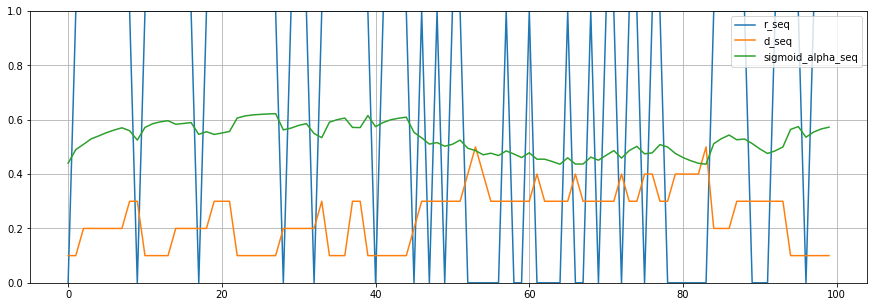

In [19]:
plt.figure(figsize=[15, 5], facecolor="white")
plt.plot(r_seq[:100], label="r_seq")
plt.plot((d_seq[:100] + 1) / 10, label="d_seq")
plt.plot(sigmoid_alpha_seq[:100], label="sigmoid_alpha_seq")
plt.grid()
plt.ylim(0, 1)
plt.legend()
plt.show()

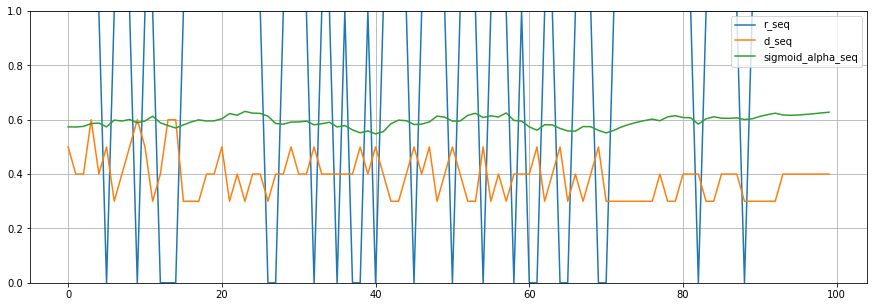

In [20]:
plt.figure(figsize=[15, 5], facecolor="white")
plt.plot(r_seq[-100:], label="r_seq")
plt.plot((d_seq[-100:] + 1) / 10, label="d_seq")
plt.plot(sigmoid_alpha_seq[-100:], label="sigmoid_alpha_seq")
plt.grid()
plt.ylim(0, 1)
plt.legend()
plt.show()

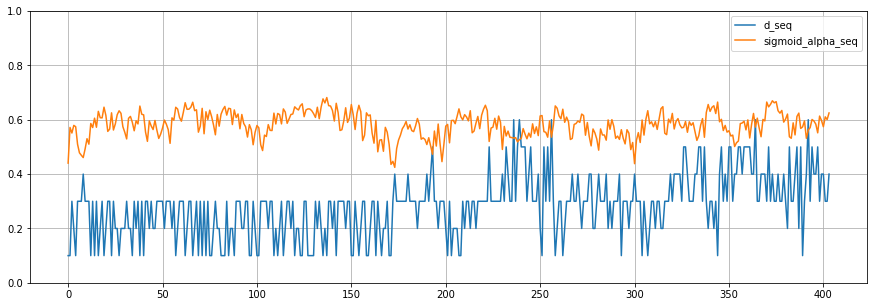

In [21]:
plt.figure(figsize=[15, 5], facecolor="white")
# plt.plot(r_seq[::10], label="r_seq")
plt.plot((d_seq[::10] + 1) / 10, label="d_seq")
plt.plot(sigmoid_alpha_seq[::10], label="sigmoid_alpha_seq")
plt.grid()
plt.ylim(0, 1)
plt.legend()
plt.show()

In [22]:
CQ_seq.shape, r_seq.shape

((4032, 37), (4032,))

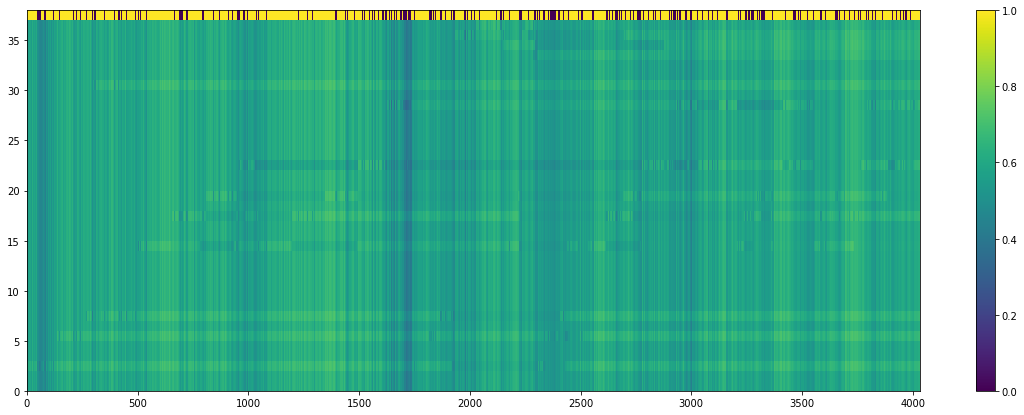

In [23]:
plt.figure(figsize=[20, 7], facecolor="white")
temp = np.concatenate([CQ_seq.T, [r_seq]], axis=0)
plt.pcolormesh(temp)
plt.colorbar()
plt.show()

# plt.figure(figsize=[15, 0.5], facecolor="white")
# plt.pcolormesh(r_seq)
# plt.show()

In [24]:
true_indices = \
    (dataset.c_list == "01 집합의 뜻과 표현") | \
    (dataset.c_list == "02 집합의 연산") | \
    (dataset.c_list == "03 명제") | \
    (dataset.c_list == "04 함수") | \
    (dataset.c_list == "05 유리함수") | \
    (dataset.c_list == "06 무리함수") | \
    (dataset.c_list == "07 경우의 수와 순열") | \
    (dataset.c_list == "08 조합")

In [25]:
true_indices

array([False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False])

In [26]:
CQ_seq[0][true_indices], CQ_seq[48][true_indices], CQ_seq[-1][true_indices], c_seq, d_seq

(array([0.37512153, 0.44032025, 0.44032025, 0.44032025, 0.44032025,
        0.44032025, 0.44032025, 0.44032025], dtype=float32),
 array([0.54400593, 0.5159318 , 0.5159318 , 0.5159318 , 0.5159318 ,
        0.5159318 , 0.5159318 , 0.5159318 ], dtype=float32),
 array([0.67718536, 0.6815236 , 0.67664105, 0.6323702 , 0.67641056,
        0.6229829 , 0.67632955, 0.6762726 ], dtype=float32),
 array([ 2,  2,  2, ..., 28, 28, 28]),
 array([0, 0, 1, ..., 3, 3, 3]))

In [27]:
dataset.c_list[true_indices]

array(['01 집합의 뜻과 표현', '02 집합의 연산', '03 명제', '04 함수', '05 유리함수',
       '06 무리함수', '07 경우의 수와 순열', '08 조합'], dtype=object)

In [28]:
sigmoid_alpha_seq[0], sigmoid_alpha_seq[48], sigmoid_alpha_seq[-1], c_seq, d_seq

(0.44032025,
 0.5159318,
 0.62775505,
 array([ 2,  2,  2, ..., 28, 28, 28]),
 array([0, 0, 1, ..., 3, 3, 3]))